<a href="https://colab.research.google.com/github/latruonghai/CS114.K21/blob/master/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import cv2
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [2]:
drive.mount("/content/gdrive")
train_path = 'gdrive/My Drive/OpenCv/Train'
test_path = 'gdrive/My Drive/OpenCv/Test'
image_size = 216

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
def read_date(path):
  img = []
  label = []
  folders = os.listdir(path)
  for folder in os.listdir(path):
    for files in os.listdir(path+'/'+folder):
      files_name = path + '/'+folder+'/' + files
      ##print(files_name)
      image = cv2.imread(files_name,0)
      
      image = cv2.resize(image, (image_size, image_size))
      images=np.reshape(image, image_size*image_size)
      img.append(images)
      label.append(folder)
  return np.asarray(img),np.asarray(label)
x_train, y_train = read_date(train_path)
x_test,y_test = read_date(test_path)

In [7]:
x_train.shape

(240, 46656)

TypeError: ignored

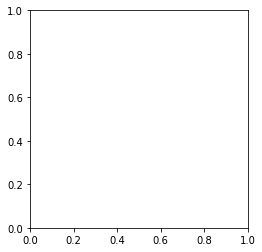

In [8]:
from matplotlib import pyplot as plt
plt.imshow(x_train[100], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(y_train[100])
#print(x_train.shape)

In [9]:
y_train.shape

(240,)

In [10]:
!pip install tensorflow==1.4.0

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
y_train = labelencoder_X.fit_transform(y_train)
y_test=labelencoder_X.transform(y_test)
print (y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
image_size = 216
num_steps = 500
batch_size = 128
display_step = 10

# Network Parameters
num_input = image_size * image_size 
num_classes = 27 

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_input])
y = tf.placeholder(tf.int32, [None])

In [13]:
def random_batch(x_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(x_train), batch_size)
    x_batch = x_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return x_batch, y_batch


# Create the neural network
def conv_net(x):
  x = tf.reshape(x, shape=[-1, image_size, image_size, 1])
  conv1 = tf.layers.conv2d(x, 8, 5, activation=tf.nn.relu)
  conv1 = tf.layers.max_pooling2d(conv1, 4, 4)
  conv2 = tf.layers.conv2d(conv1, 16, 5, activation=tf.nn.relu)
  conv2 = tf.layers.max_pooling2d(conv2, 4, 4)
  conv3 = tf.layers.conv2d(conv2, 32, 3, activation=tf.nn.relu)
  conv3 = tf.layers.max_pooling2d(conv3, 2, 2)

  fc1 = tf.contrib.layers.flatten(conv3)
  fc1 = tf.layers.dense(fc1, 256)
  out = tf.layers.dense(fc1, num_classes)

  return out



Khoi Tao Cac Variable

In [14]:
pred = conv_net(x)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred, labels=y)
cost = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer()
training_op=optimizer.minimize(cost)

correct = tf.nn.in_top_k(pred, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
# Initializing the variables
init = tf.global_variables_initializer()

In [15]:
num_steps = 120
sess= tf.Session()
best_accuracy = 0
consecutive_accuracy = []
n_epochs = 50

sess.run(init)
for step in range(1, num_steps+1):
  x_batch, y_batch = random_batch(x_train, y_train, batch_size)
  sess.run(training_op, feed_dict={x: x_batch, y: y_batch})
  if step % 10 == 0:
    acc = sess.run( accuracy, feed_dict={x: x_batch,y: y_batch})
    print('Step: {}\tAccuracy: {}'.format(step,acc))
print("Optimization Finished!")

Step: 10	Accuracy: 0.40625
Step: 20	Accuracy: 0.5078125
Step: 30	Accuracy: 0.515625
Step: 40	Accuracy: 0.6953125
Step: 50	Accuracy: 0.8125
Step: 60	Accuracy: 0.90625
Step: 70	Accuracy: 0.9765625
Step: 80	Accuracy: 0.96875
Step: 90	Accuracy: 0.96875
Step: 100	Accuracy: 0.96875
Step: 110	Accuracy: 1.0
Step: 120	Accuracy: 1.0
Optimization Finished!


In [ ]:
print(acc)

1.0


In [ ]:
x_train.shape[0]

240

In [17]:
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
from sklearn.externals import joblib 
import cv2
import matplotlib.pyplot as plt
from mns import sliding_window
import numpy as np
from sklearn import preprocessing
%matplotlib inline

path="data/Face/Test/3.png" # đường dẫn ảnh muốn test

im1=cv2.imread(path)
im = imread(path, as_grey=False)

scale = 0
downscale=1.25
min_wdw_sz = (384, 256) # window size 
step_size = (10, 10)

detections = []
for im_scaled in pyramid_gaussian(im, downscale=downscale):
    cd = []
    if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
        break
    for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
        if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
            continue
   
        image=np.reshape(im_window, 256*384)

        x_test=[]
        x_test.append(image)
        x_test=np.asarray(x_test)
        y_test=sess.run(index,feed_dict={X: x_test})
        y_conf=sess.run(conf,feed_dict={X: x_test})
        pred=np.asarray(y_test)[0]
        conf_value=y_conf.reshape(-1)[pred]
        if pred == 1:
            print("detection location",x,y)
            detections.append((x, y, conf_value,
                int(min_wdw_sz[0]*(downscale**scale)),
                int(min_wdw_sz[1]*(downscale**scale))))
            cd.append(detections[-1])        
    scale+=1

clone = im1.copy()
k=10000
for (x_tl, y_tl, _, w, h) in detections:
    print(str(k))
    s_file='data/tmp/FalsePos/neg'+str(k)+'.pgm'
    k=k+1
    cv2.rectangle(im1, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 255), thickness=2)
    img=clone[y_tl:y_tl+h,x_tl:x_tl+w]
    cv2.imwrite(s_file,img)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))

plt.show()

threshold=.3
detections = nms(detections, threshold)
for (x_tl, y_tl, _, w, h) in detections:
    cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 255), thickness=2)
plt.imshow(cv2.cvtColor(clone, cv2.COLOR_BGR2RGB))

plt.show()

ImportError: ignored

In [5]:
!pip install nms mns